<a href="https://colab.research.google.com/github/GodTANKS/Solarsystem_object_orbit_3D/blob/main/%ED%83%9C%EC%96%91%EA%B3%84_%EC%B2%9C%EC%B2%B4_3%EC%B0%A8%EC%9B%90_%EA%B6%A4%EB%8F%84_%EA%B7%B8%EB%A6%AC%EA%B8%B0_%ED%83%90%EC%83%89%EC%A0%81_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files # 코랩(colab)으로 파일 불러오기
import pandas as pd # 데이터 처리 패키지
import seaborn as sns # 데이터 시각화(그래프 표현) 패키지1
import matplotlib.pyplot as plt # 데이터 시각화(그래프 표현) 패키지2

In [2]:
uploaded = files.upload() # 파일 업로드하기
df = pd.read_csv('solarsystem_sbdb_planet_dwarfplanet_asteroid(pha, neo, mainbelt)_comet_part(1252).csv') # 태양계 천체 1252개 csv파일 불러오기

Saving solarsystem_sbdb_planet_dwarfplanet_asteroid(pha, neo, mainbelt)_comet_part(1252).csv to solarsystem_sbdb_planet_dwarfplanet_asteroid(pha, neo, mainbelt)_comet_part(1252).csv


In [3]:
display(df) # 전체 데이터
print('전체 행렬 구조:', df.shape) # 행렬 구조 확인
print('열 이름:', df.columns) # 열 이름 출력
print('열 개수:', df.columns.size) # 열 개수 출력
print('인덱스(행) 정보:', df.index) # 인덱스(행) 정보 출력
print('인덱스(행) 개수:', df.index.size) # 인덱스(행) 개수 출력

,full_name,pdes,a,e,i,om,w,primary_type,detail_type1,detail_type2
0,Mercury,Mercury,0.387099,0.205631,7.00487,48.33167,29.12478,Planet,Terrestrial,Interior
1,Venus,Venus,0.723332,0.006773,3.39471,76.68069,54.85229,Planet,Terrestrial,Interior
2,Earth,Earth,1.000000,0.016710,0.00005,348.73936,114.20783,Planet,Terrestrial,NaN
3,Mars,Mars,1.523662,0.093500,1.85061,49.57854,286.46230,Planet,Terrestrial,Outer
4,Jupiter,Jupiter,5.203363,0.048393,1.30530,100.55615,274.19770,Planet,Jovian,Outer
...,...,...,...,...,...,...,...,...,...,...
1247,C/2015 YG1 (NEOWISE),2015 YG1,17.170000,0.879200,57.34000,350.51000,102.79000,Comet,FEO,Short-period
1248,12P/Pons-Brooks,12P,17.120000,0.954300,74.11000,255.74000,199.01000,Comet,NEO,Short-period
1249,C/1921 H1 (Dubiago),1921 H1,17.100000,0.934700,22.35000,67.13000,97.48000,Comet,NEO,Short-period
1250,23P/Brorsen-Metcalf,23P,17.070000,0.972000,19.33000,311.59000,129.61000,Comet,NEO,Short-period


전체 행렬 구조: (1252, 10)
열 이름: Index(['full_name', 'pdes', 'a', 'e', 'i', 'om', 'w', 'primary_type',
       'detail_type1', 'detail_type2'],
      dtype='object')
열 개수: 10
인덱스(행) 정보: RangeIndex(start=0, stop=1252, step=1)
인덱스(행) 개수: 1252


In [4]:
print(df.describe()) # 기술 통계

                   a            e            i           om            w
count    1252.000000  1252.000000  1252.000000  1252.000000  1252.000000
mean      280.653422     0.287853    16.209068   178.198341   178.464772
std      6052.933099     0.257486    21.734015   103.716717   103.993282
min         0.387099     0.005600     0.000050     0.050000     0.600000
25%         2.296750     0.104675     5.842500    91.810000    89.145000
50%         2.726000     0.183650    10.580000   171.590000   174.410000
75%         3.133250     0.424975    18.035000   266.740000   269.465000
max    171000.000000     0.999900   165.910000   359.940000   359.750000


In [5]:
print(df.info()) # 요약 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   full_name     1252 non-null   object 
 1   pdes          1252 non-null   object 
 2   a             1252 non-null   float64
 3   e             1252 non-null   float64
 4   i             1252 non-null   float64
 5   om            1252 non-null   float64
 6   w             1252 non-null   float64
 7   primary_type  1252 non-null   object 
 8   detail_type1  1247 non-null   object 
 9   detail_type2  1246 non-null   object 
dtypes: float64(5), object(5)
memory usage: 97.9+ KB
None


In [6]:
print(df['primary_type'].value_counts()) # 범주형 속성(주요유형)의 데이터 종류와 개수
print(df['detail_type1'].value_counts()) # 범주형 속성(세부유형1)의 데이터 종류와 개수
print(df['detail_type2'].value_counts()) # 범주형 속성(세부유형2)의 데이터 종류와 개수

Asteroid       1137
Comet           102
Planet            8
Dwarfplanet       5
Name: primary_type, dtype: int64
FEO            900
NEO            256
PHA             83
Terrestrial      4
Jovian           4
Name: detail_type1, dtype: int64
Main-belt         689
Apollo            160
Amor              128
Jupiter-trojan    127
Short-period       82
Aten               25
Long-period        20
Atira               8
Outer               5
Interior            2
Name: detail_type2, dtype: int64


In [7]:
df_p = df[ df['primary_type'] == 'Planet' ] # '주요유형'열 중 '행성'에 속한 모든 데이터 추출
display('행성', df_p)
df_d = df[ df['primary_type'] == 'Dwarfplanet' ] # '주요유형'열 중 '왜소행성'에 속한 모든 데이터 추출
display('왜소행성', df_d)
df_a = df[ df['primary_type'] == 'Asteroid' ] # '주요유형'열 중 '소행성'에 속한 모든 데이터 추출
display('소행성', df_a)
df_c = df[ df['primary_type'] == 'Comet' ] # '주요유형'열 중 '혜성'에 속한 모든 데이터 추출
display('혜성', df_c)

'행성'

,full_name,pdes,a,e,i,om,w,primary_type,detail_type1,detail_type2
0,Mercury,Mercury,0.387099,0.205631,7.00487,48.33167,29.12478,Planet,Terrestrial,Interior
1,Venus,Venus,0.723332,0.006773,3.39471,76.68069,54.85229,Planet,Terrestrial,Interior
2,Earth,Earth,1.000000,0.016710,0.00005,348.73936,114.20783,Planet,Terrestrial,NaN
3,Mars,Mars,1.523662,0.093500,1.85061,49.57854,286.46230,Planet,Terrestrial,Outer
4,Jupiter,Jupiter,5.203363,0.048393,1.30530,100.55615,274.19770,Planet,Jovian,Outer
5,Saturn,Saturn,9.537070,0.054151,2.48446,113.71504,338.71690,Planet,Jovian,Outer
6,Uranus,Uranus,19.191264,0.047168,0.76986,74.22988,96.73436,Planet,Jovian,Outer
7,Neptune,Neptune,30.068963,0.008586,1.76917,131.72169,273.24966,Planet,Jovian,Outer


'왜소행성'

,full_name,pdes,a,e,i,om,w,primary_type,detail_type1,detail_type2
8,Pluto,134340,39.445070,0.250249,17.089001,110.376958,112.597142,Dwarfplanet,NaN,NaN
9,Ceres,1,2.767182,0.078817,10.586343,80.260149,73.470462,Dwarfplanet,NaN,NaN
10,Eris,136199,68.145365,0.431958,43.760496,36.070688,150.997034,Dwarfplanet,NaN,NaN
11,Haumea,136108,42.908305,0.200029,28.210369,122.031029,240.422076,Dwarfplanet,NaN,NaN
12,Makemake,136472,45.264503,0.166136,29.018431,79.361218,295.822388,Dwarfplanet,NaN,NaN


'소행성'

,full_name,pdes,a,e,i,om,w,primary_type,detail_type1,detail_type2
13,1 Ceres (A801 AA),1,2.7670,0.0788,10.59,80.26,73.47,Asteroid,FEO,Main-belt
14,2 Pallas (A802 FA),2,2.7700,0.2301,34.93,172.92,310.86,Asteroid,FEO,Main-belt
15,3 Juno (A804 RA),3,2.6700,0.2565,12.99,169.84,247.74,Asteroid,FEO,Main-belt
16,4 Vesta (A807 FA),4,2.3630,0.0888,7.14,103.76,151.60,Asteroid,FEO,Main-belt
17,5 Astraea (A845 XA),5,2.5790,0.1879,5.36,141.52,358.89,Asteroid,FEO,Main-belt
...,...,...,...,...,...,...,...,...,...,...
1145,418265 (2008 EA32),418265,0.6159,0.3050,28.26,100.95,181.83,Asteroid,NEO,Atira
1146,594913 'Aylo'chaxnim (2020 AV2),594913,0.5554,0.1771,15.87,6.70,187.33,Asteroid,NEO,Atira
1147,613676 (2006 WE4),613676,0.7848,0.1829,24.77,311.00,318.59,Asteroid,NEO,Atira
1148,434326 (2004 JG6),434326,0.6353,0.5312,18.94,37.01,353.00,Asteroid,PHA,Atira


'혜성'

,full_name,pdes,a,e,i,om,w,primary_type,detail_type1,detail_type2
1150,C/2007 D1 (LINEAR),2007 D1,171000.00,0.9999,41.51,171.08,340.14,Comet,FEO,Long-period
1151,C/2017 AB5 (PANSTARRS),2017 AB5,128000.00,0.9999,32.43,42.69,78.40,Comet,FEO,Long-period
1152,C/2009 U5 (Grauer),2009 U5,10600.00,0.9994,25.47,121.17,23.81,Comet,FEO,Long-period
1153,C/2012 LP26 (Palomar),2012 LP26,9075.00,0.9993,25.38,153.99,145.15,Comet,FEO,Long-period
1154,C/2004 P1 (NEAT),2004 P1,8080.00,0.9993,28.82,284.18,16.58,Comet,FEO,Long-period
...,...,...,...,...,...,...,...,...,...,...
1247,C/2015 YG1 (NEOWISE),2015 YG1,17.17,0.8792,57.34,350.51,102.79,Comet,FEO,Short-period
1248,12P/Pons-Brooks,12P,17.12,0.9543,74.11,255.74,199.01,Comet,NEO,Short-period
1249,C/1921 H1 (Dubiago),1921 H1,17.10,0.9347,22.35,67.13,97.48,Comet,NEO,Short-period
1250,23P/Brorsen-Metcalf,23P,17.07,0.9720,19.33,311.59,129.61,Comet,NEO,Short-period


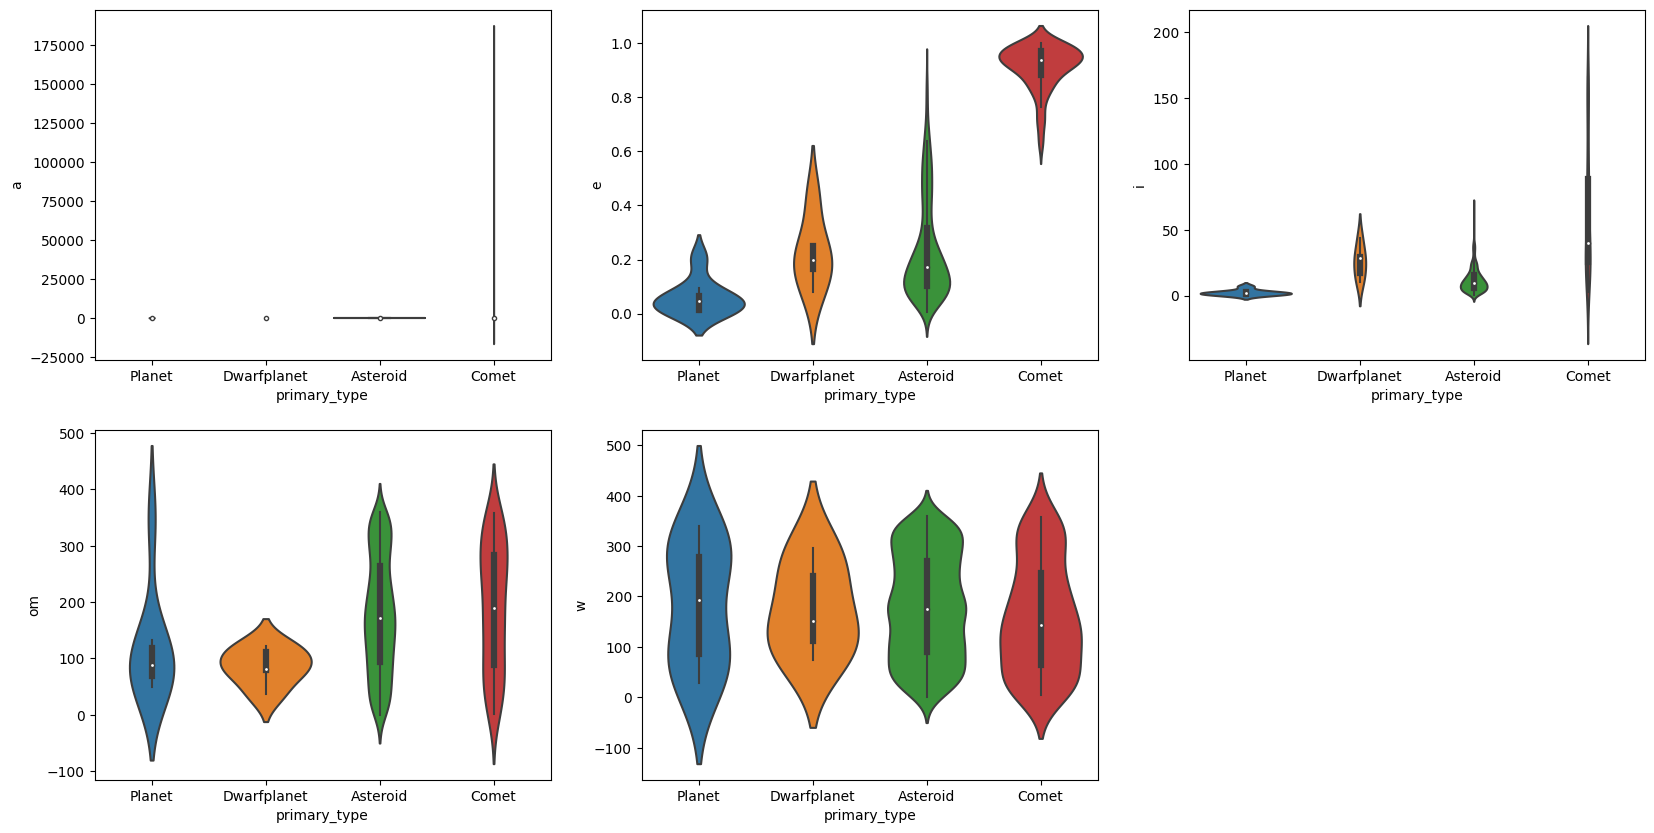

In [8]:
fig = plt.figure(figsize=(20,10)) # 그림 크기 지정

ax1 = fig.add_subplot(2,3,1) # 2행 3열 첫 번째 2D 그림 생성
ax1 = sns.violinplot(x='primary_type', y='a', data=df) # df 변수에 대한 바이올린 그래프 생성

ax2 = fig.add_subplot(2,3,2) # 2행 3열 두 번째 2D 그림 생성
ax2 = sns.violinplot(x='primary_type', y='e', data=df) # df 변수에 대한 바이올린 그래프 생성

ax3 = fig.add_subplot(2,3,3) # 2행 3열 세 번째 2D 그림 생성
ax3 = sns.violinplot(x='primary_type', y='i', data=df) # df 변수에 대한 바이올린 그래프 생성
 
ax4 = fig.add_subplot(2,3,4) # 2행 3열 네 번째 2D 그림 생성
ax4 = sns.violinplot(x='primary_type', y='om', data=df) # df 변수에 대한 바이올린 그래프 생성

ax5 = fig.add_subplot(2,3,5) # 2행 3열 다섯 번째 2D 그림 생성
ax5 = sns.violinplot(x='primary_type', y='w', data=df) # df 변수에 대한 바이올린 그래프 생성

plt.show() # 그래프 시각화

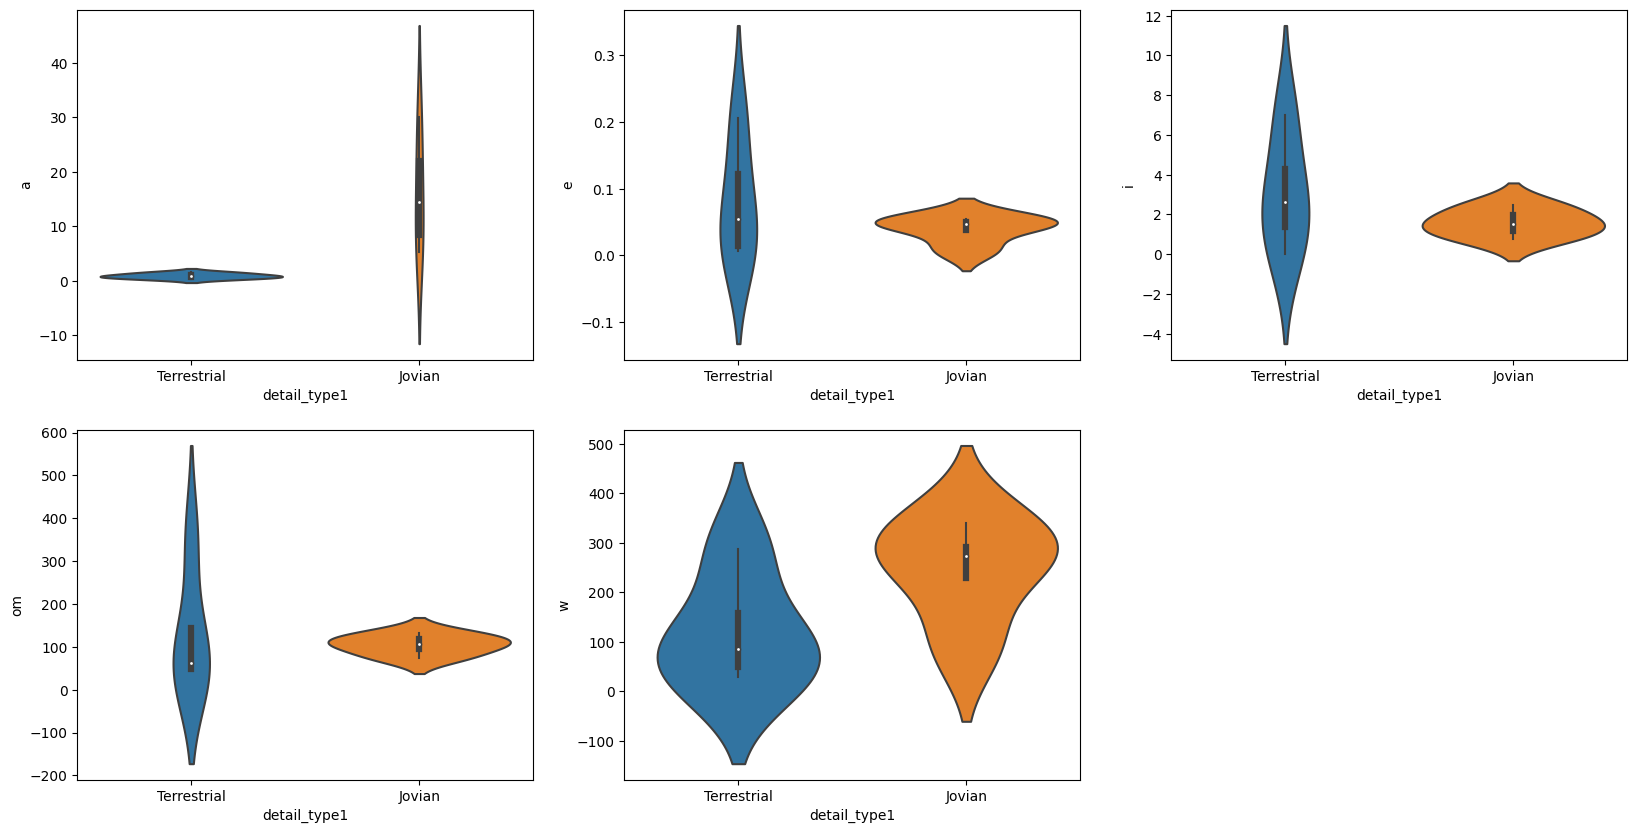

In [9]:
fig = plt.figure(figsize=(20,10)) # 그림 크기 지정

ax1 = fig.add_subplot(2,3,1) # 2행 3열 첫 번째 2D 그림 생성
ax1 = sns.violinplot(x='detail_type1', y='a', data=df_p) # df_p 변수에 대한 바이올린 그래프 생성

ax2 = fig.add_subplot(2,3,2) # 2행 3열 두 번째 2D 그림 생성
ax2 = sns.violinplot(x='detail_type1', y='e', data=df_p) # df_p 변수에 대한 바이올린 그래프 생성

ax3 = fig.add_subplot(2,3,3) # 2행 3열 세 번째 2D 그림 생성
ax3 = sns.violinplot(x='detail_type1', y='i', data=df_p) # df_p 변수에 대한 바이올린 그래프 생성

ax4 = fig.add_subplot(2,3,4) # 2행 3열 네 번째 2D 그림 생성 
ax4 = sns.violinplot(x='detail_type1', y='om', data=df_p) # df_p 변수에 대한 바이올린 그래프 생성

ax5 = fig.add_subplot(2,3,5) # 2행 3열 다섯 번째 2D 그림 생성
ax5 = sns.violinplot(x='detail_type1', y='w', data=df_p) # df_p 변수에 대한 바이올린 그래프 생성

plt.show() # 그래프 시각화

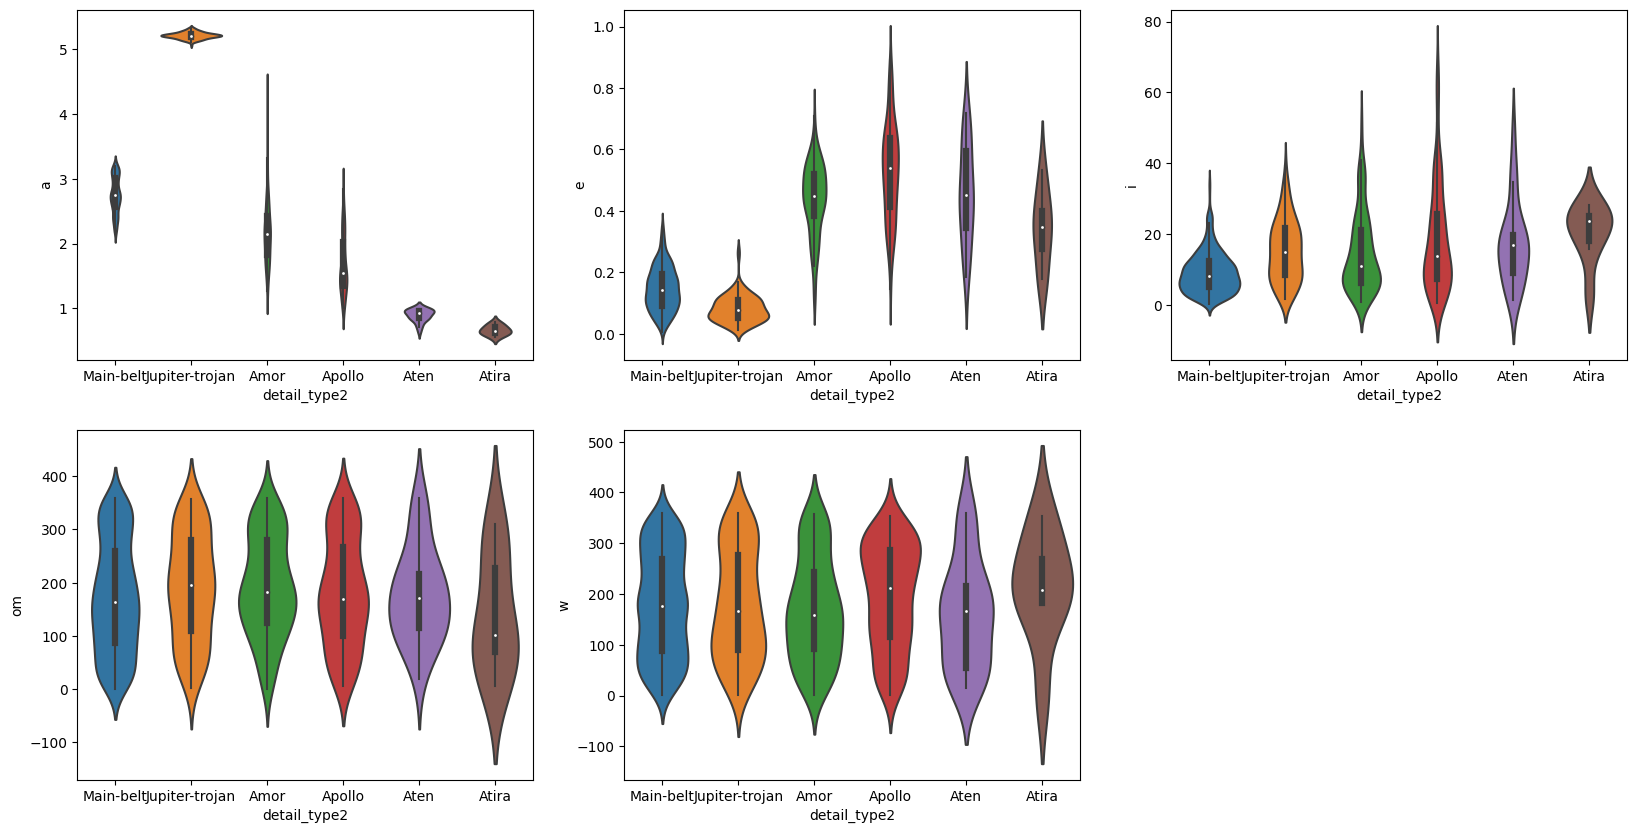

In [10]:
fig = plt.figure(figsize=(20,10)) # 그림 크기 지정

ax1 = fig.add_subplot(2,3,1) # 2행 3열 첫 번째 2D 그림 생성
ax1 = sns.violinplot(x='detail_type2', y='a', data=df_a) # df_a 변수에 대한 바이올린 그래프 생성

ax2 = fig.add_subplot(2,3,2) # 2행 3열 두 번째 2D 그림 생성
ax2 = sns.violinplot(x='detail_type2', y='e', data=df_a) # df_a 변수에 대한 바이올린 그래프 생성

ax3 = fig.add_subplot(2,3,3) # 2행 3열 세 번째 2D 그림 생성
ax3 = sns.violinplot(x='detail_type2', y='i', data=df_a) # df_a 변수에 대한 바이올린 그래프 생성

ax4 = fig.add_subplot(2,3,4) # 2행 3열 네 번째 2D 그림 생성
ax4 = sns.violinplot(x='detail_type2', y='om', data=df_a) # df_a 변수에 대한 바이올린 그래프 생성

ax5 = fig.add_subplot(2,3,5) # 2행 3열 다섯 번째 2D 그림 생성
ax5 = sns.violinplot(x='detail_type2', y='w', data=df_a) # df_a 변수에 대한 바이올린 그래프 생성

plt.show() # 그래프 시각화

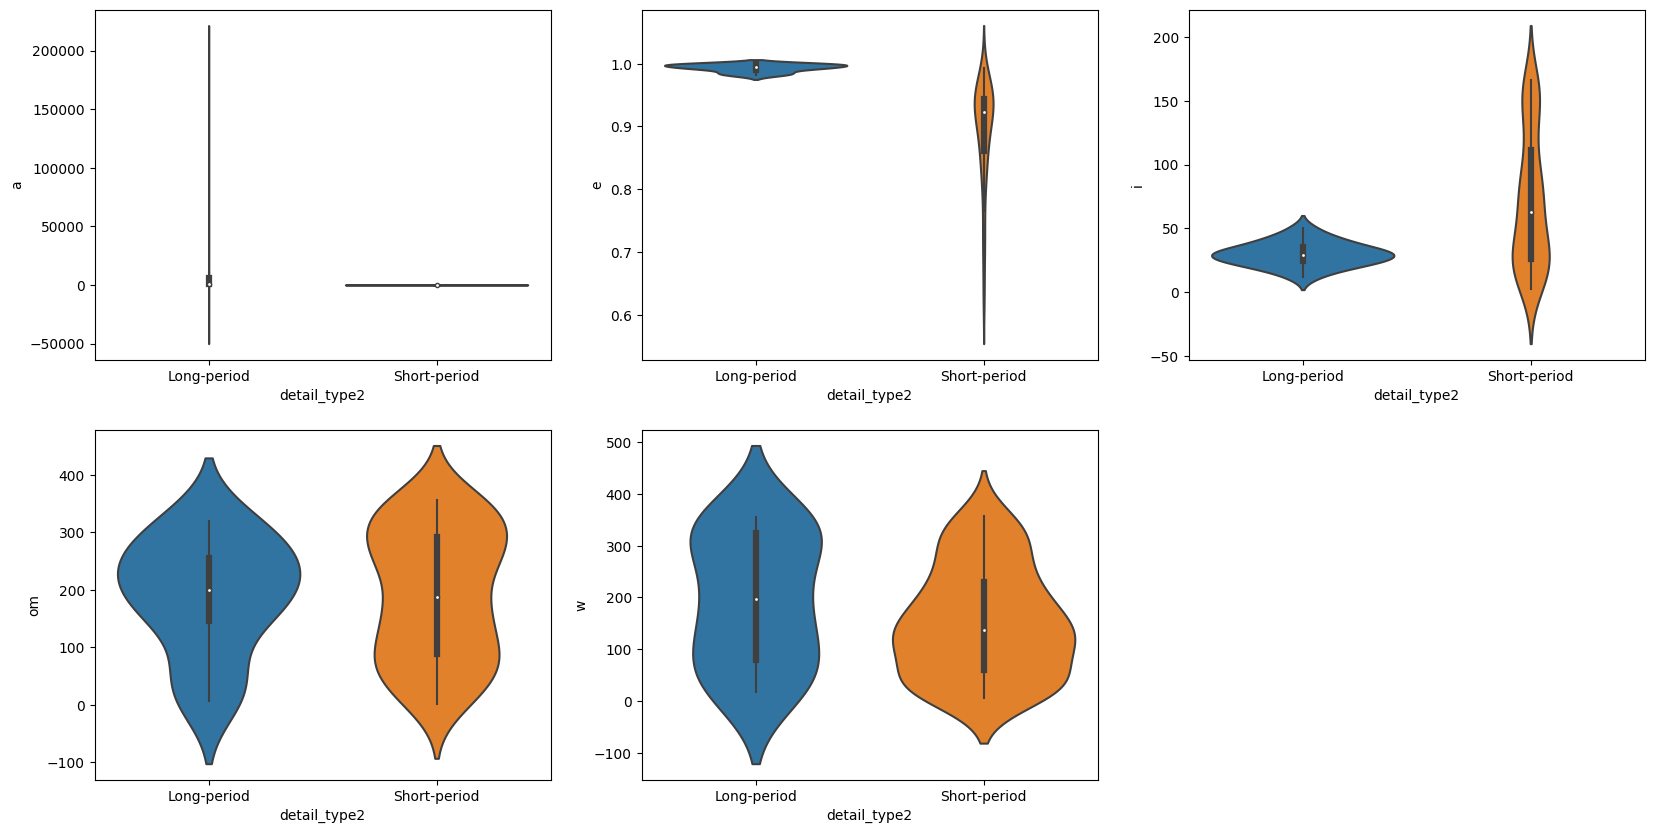

In [11]:
fig = plt.figure(figsize=(20,10)) # 그림 크기 지정

ax1 = fig.add_subplot(2,3,1) # 2행 3열 첫 번째 2D 그림 생성
ax1 = sns.violinplot(x='detail_type2', y='a', data=df_c) # df_c 변수에 대한 바이올린 그래프 생성

ax2 = fig.add_subplot(2,3,2) # 2행 3열 두 번째 2D 그림 생성
ax2 = sns.violinplot(x='detail_type2', y='e', data=df_c) # df_c 변수에 대한 바이올린 그래프 생성

ax3 = fig.add_subplot(2,3,3) # 2행 3열 세 번째 2D 그림 생성
ax3 = sns.violinplot(x='detail_type2', y='i', data=df_c) # df_c 변수에 대한 바이올린 그래프 생성

ax4 = fig.add_subplot(2,3,4) # 2행 3열 네 번째 2D 그림 생성
ax4 = sns.violinplot(x='detail_type2', y='om', data=df_c) # df_c 변수에 대한 바이올린 그래프 생성

ax5 = fig.add_subplot(2,3,5) # 2행 3열 다섯 번째 2D 그림 생성
ax5 = sns.violinplot(x='detail_type2', y='w', data=df_c) # df_c 변수에 대한 바이올린 그래프 생성

plt.show() # 그래프 시각화